In [9]:
import sys
import torch as t
import numpy as np
from matplotlib import pyplot as plt
import json
from itertools import product
sys.path.append('/workspace/wilson/Finite-groups/src')
from model import MLP3, MLP4, InstancedModule
from utils import *
from group_data import *
from jaxtyping import Float
from typing import Union
from einops import repeat
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import plotly.graph_objects as go
import copy
import math
from itertools import product
from llc import *
import gc
from collections import defaultdict
import plotly.express as px

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
class Abs(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, input: t.Tensor) -> t.Tensor:
        return t.abs(input)

class Square(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, input: t.Tensor) -> t.Tensor:
        return input**2

In [28]:
#path = '/workspace/models/2024_08_09_02_36_30_S5_MLP3_corrected_inits'
path = '/workspace/wilson/Finite-groups/models/2024-08-09_17-22-34_B_5_'
models, params = load_models(path, sel='final')

100%|██████████| 1/1 [00:00<00:00, 16.17it/s]


In [29]:
model = models[0].to(device)

In [30]:
data = GroupData(params)

Intersection size: 1024/1024 (1.00)
Added 1024 elements from intersection
Added 0 elements from group 0: B(5)
Taking random subset: 409/1024 (0.40)
Train set size: 409/1024 (0.40)


In [31]:
loss_dict = test_loss(model, data)

In [32]:
loss_dict.keys()

dict_keys(['G0_loss', 'G0_acc'])

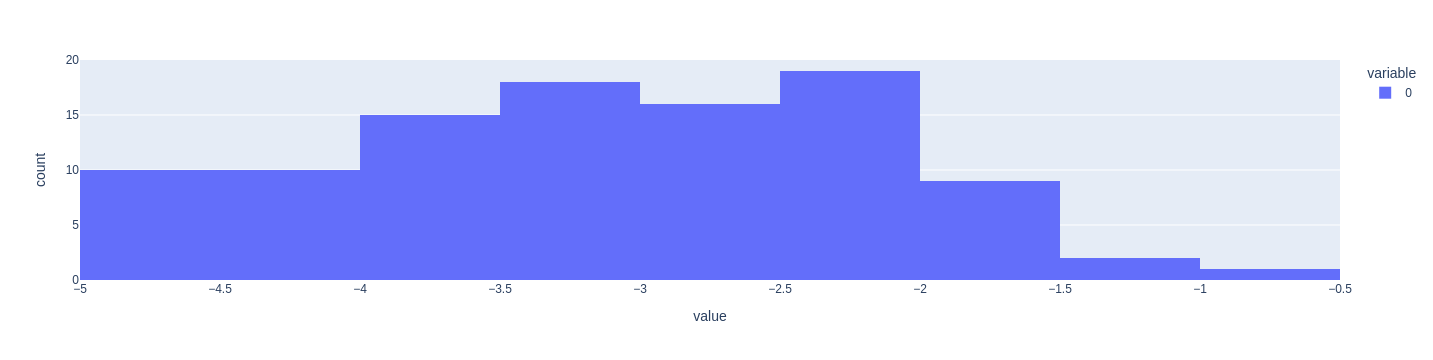

In [33]:
px.histogram(loss_dict['G0_loss'].log().tolist())

In [34]:
model.activation = Abs()

In [35]:
abs_loss_dict = test_loss(model, data)

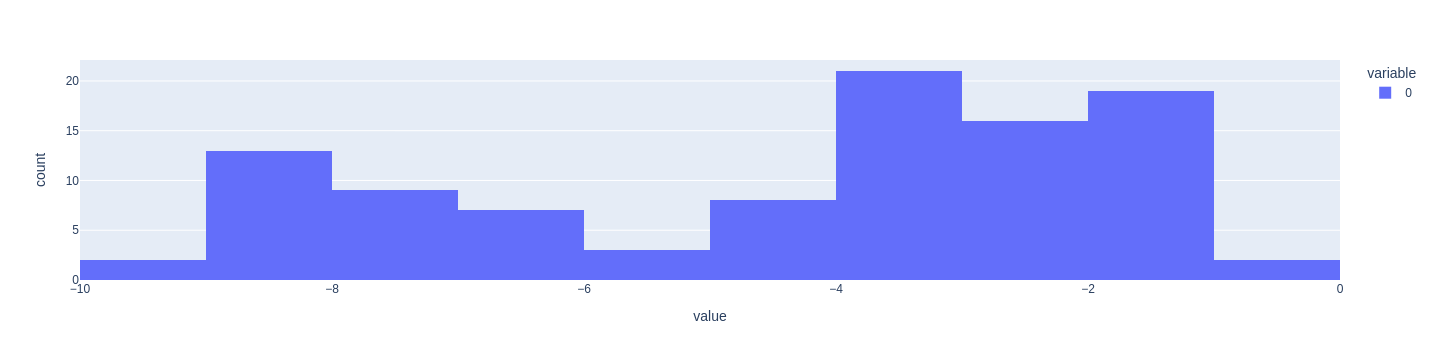

In [36]:
px.histogram(abs_loss_dict['G0_loss'].log().tolist())

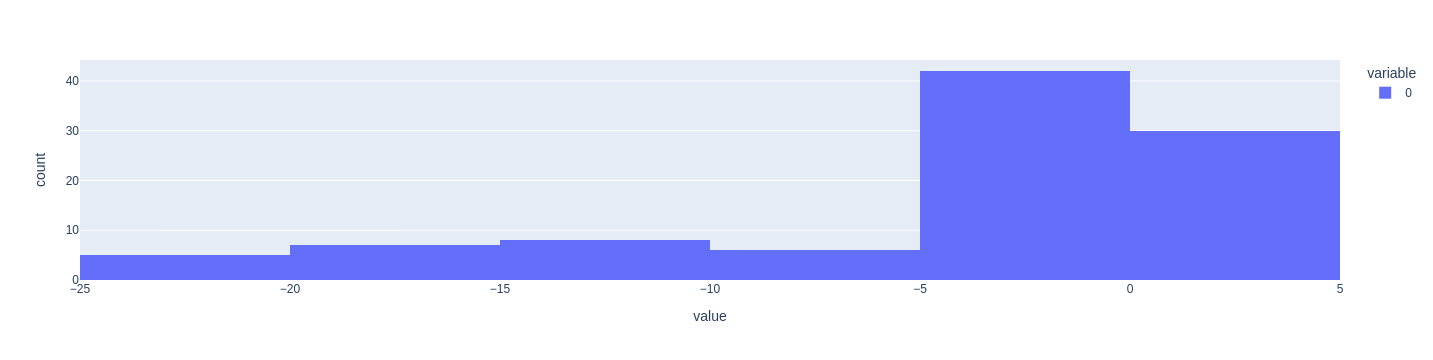

In [37]:
model.activation = Square()
sq_loss_dict = test_loss(model, data)
px.histogram(sq_loss_dict['G0_loss'].log().tolist())